In [109]:
# import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv(r"C:\Users\CHETAN\OneDrive\Desktop\loan_prediction.csv")
df.head(10)

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [111]:
df.shape

(613, 13)

In [112]:
# change column name 
df.columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','CoapplicantIncome','Loan_Amount','Loan_Amount_term','Credit History','Property_Area','Loan_Status']

In [113]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [114]:
# check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
# check dupicate value
df.duplicated().sum()

0

In [116]:
# drop null values 
df.dropna(subset=['Dependents','Self_Employed','Credit History','Loan_Amount','Loan_Amount_term'],inplace=True)

In [117]:
# fill null values in gender and married column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [118]:
# check nulls 
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant_Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [119]:
df.shape

(492, 13)

In [120]:
# check whitespace and uniuqe value 
for i in df:
    x = df[i].value_counts()
    print('\n','=='*30)
    print(x)


LP001003    1
LP002366    1
LP002361    1
LP002348    1
LP002347    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: Loan_ID, Length: 492, dtype: int64

Male      406
Female     86
Name: Gender, dtype: int64

Yes    320
No     172
Name: Married, dtype: int64

0     280
2      87
1      81
3+     44
Name: Dependents, dtype: int64

Graduate        394
Not Graduate     98
Name: Education, dtype: int64

No     423
Yes     69
Name: Self_Employed, dtype: int64

2500    7
4583    6
2600    5
5000    4
6000    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: Applicant_Income, Length: 416, dtype: int64

0.0       222
1666.0      5
2500.0      4
2083.0      3
5625.0      3
         ... 
1083.0      1
1250.0      1
3021.0      1
983.0       1
240.0       1
Name: CoapplicantIncome, Length: 235, dtype: int64

110.0    14
120.0    13
100.0    13
187.0    12
128.0     9
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0    

In [121]:
# check data tyeps and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            492 non-null    object 
 1   Gender             492 non-null    object 
 2   Married            492 non-null    object 
 3   Dependents         492 non-null    object 
 4   Education          492 non-null    object 
 5   Self_Employed      492 non-null    object 
 6   Applicant_Income   492 non-null    int64  
 7   CoapplicantIncome  492 non-null    float64
 8   Loan_Amount        492 non-null    float64
 9   Loan_Amount_term   492 non-null    float64
 10  Credit History     492 non-null    float64
 11  Property_Area      492 non-null    object 
 12  Loan_Status        492 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.8+ KB


In [122]:
# convert object using labelencoder 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [123]:
# convert object to int
df['Gender'] = lb.fit_transform(df['Gender'])
df['Married'] = lb.fit_transform(df['Married'])
df['Education'] = lb.fit_transform(df['Education'])
df['Self_Employed'] = lb.fit_transform(df['Self_Employed'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])
df['Loan_Status'] = lb.fit_transform(df['Loan_Status'])
df['Dependents'] = lb.fit_transform(df['Dependents'])

In [124]:
# delect loan id feature
df.drop('Loan_ID',axis=1,inplace=True)

In [125]:
# check dependents who have three or more 
df[df['Dependents']=='3+'].shape

(0, 12)

In [126]:
# delect data who dependent 3 or more 
df.drop(df[df['Dependents']=='3+'].index,inplace=True)

In [127]:
df['Dependents'].value_counts()

0    280
2     87
1     81
3     44
Name: Dependents, dtype: int64

In [128]:
# seprate feature and label
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

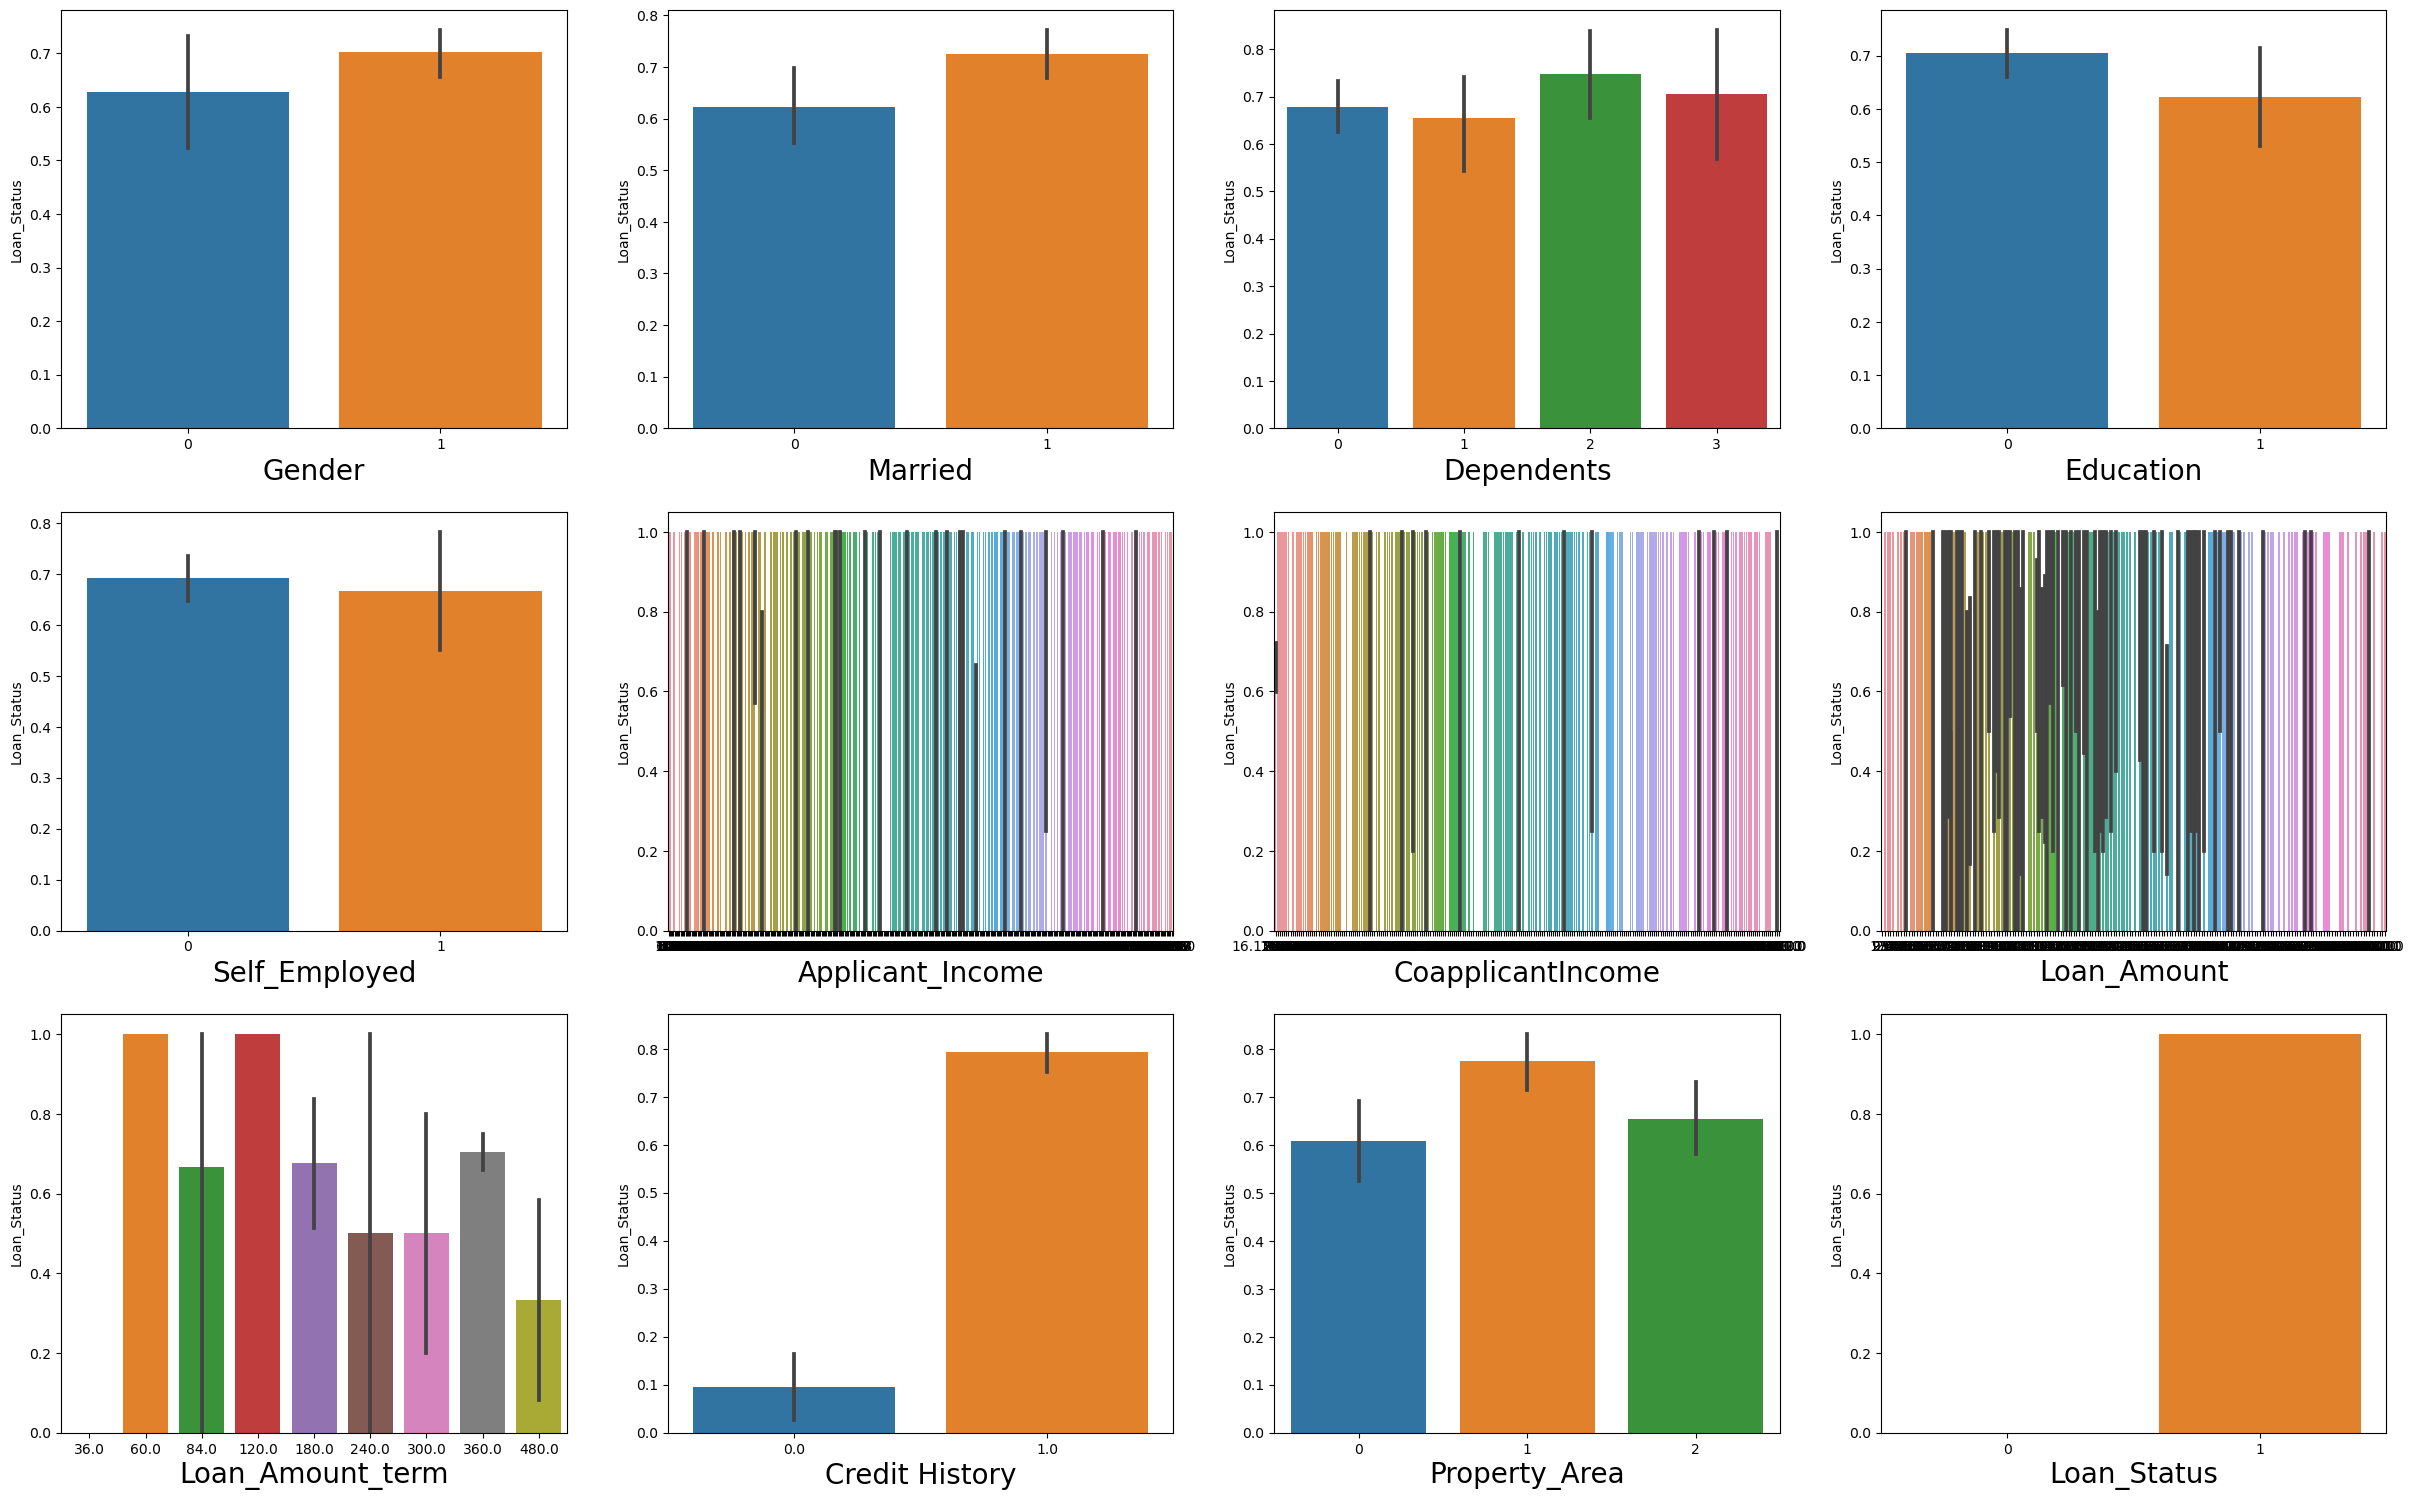

In [129]:
# check bar plot 
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.barplot(data=df,x=i,y='Loan_Status')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

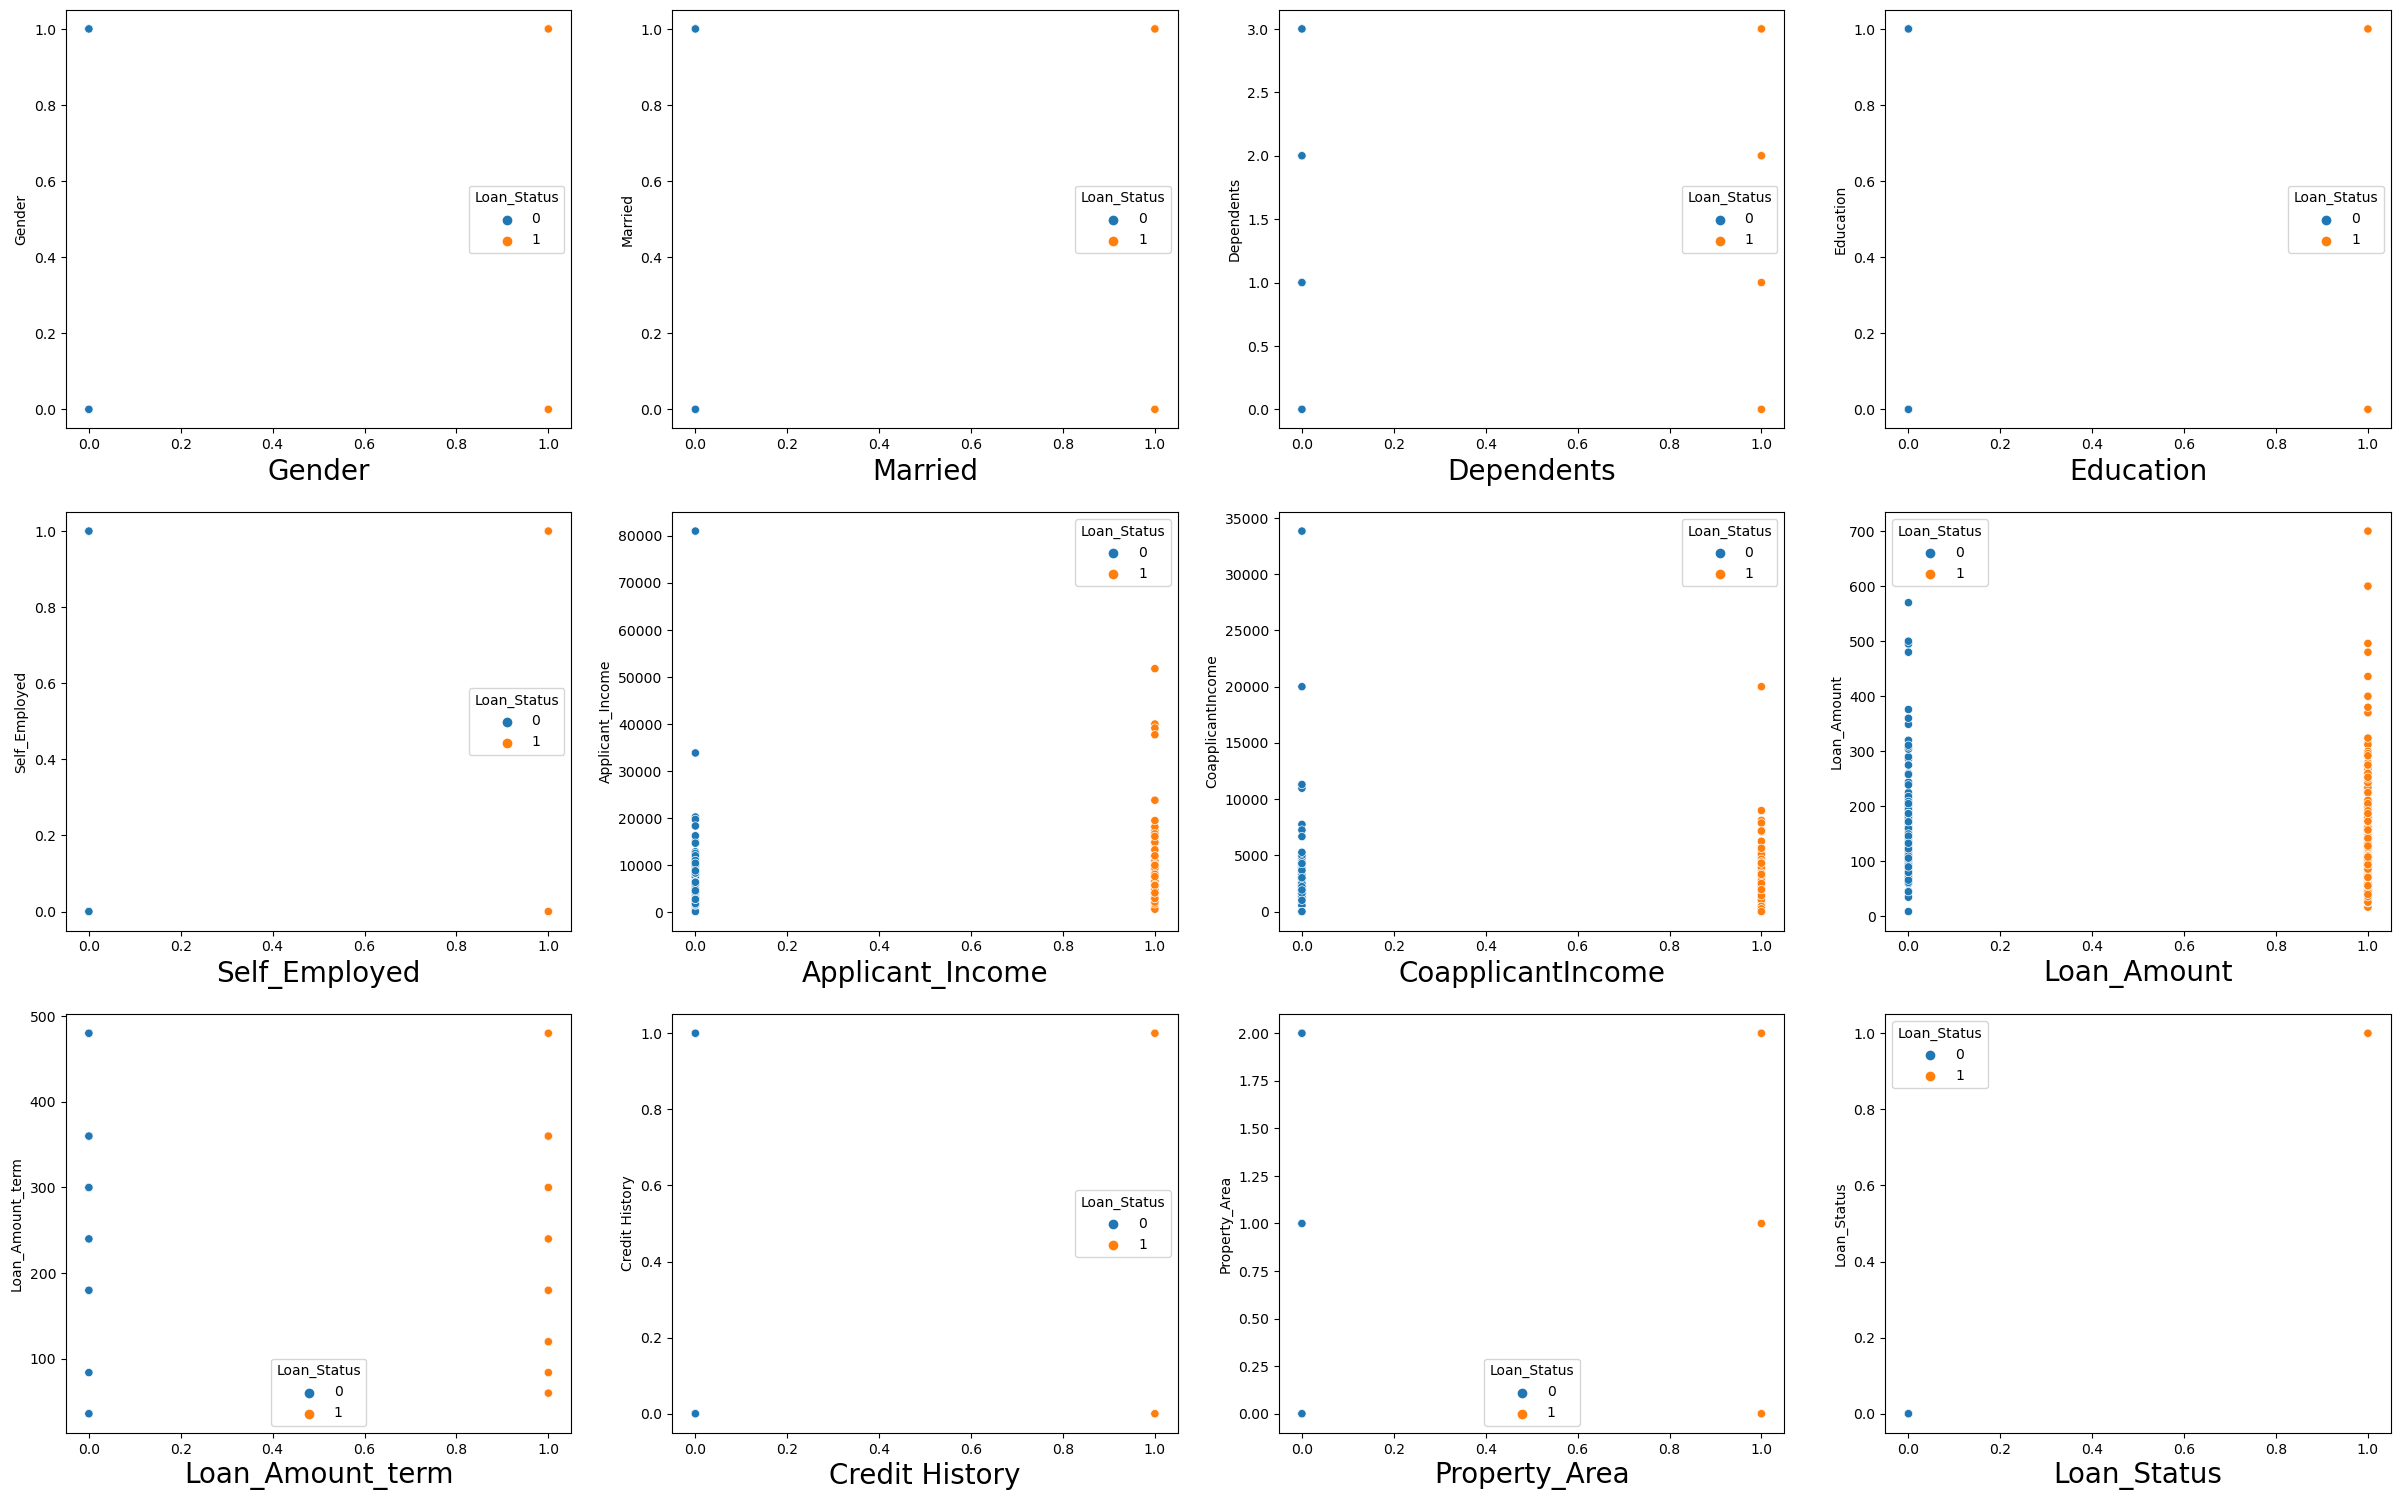

In [130]:
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.scatterplot(data=df,x='Loan_Status',y=i,hue='Loan_Status')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

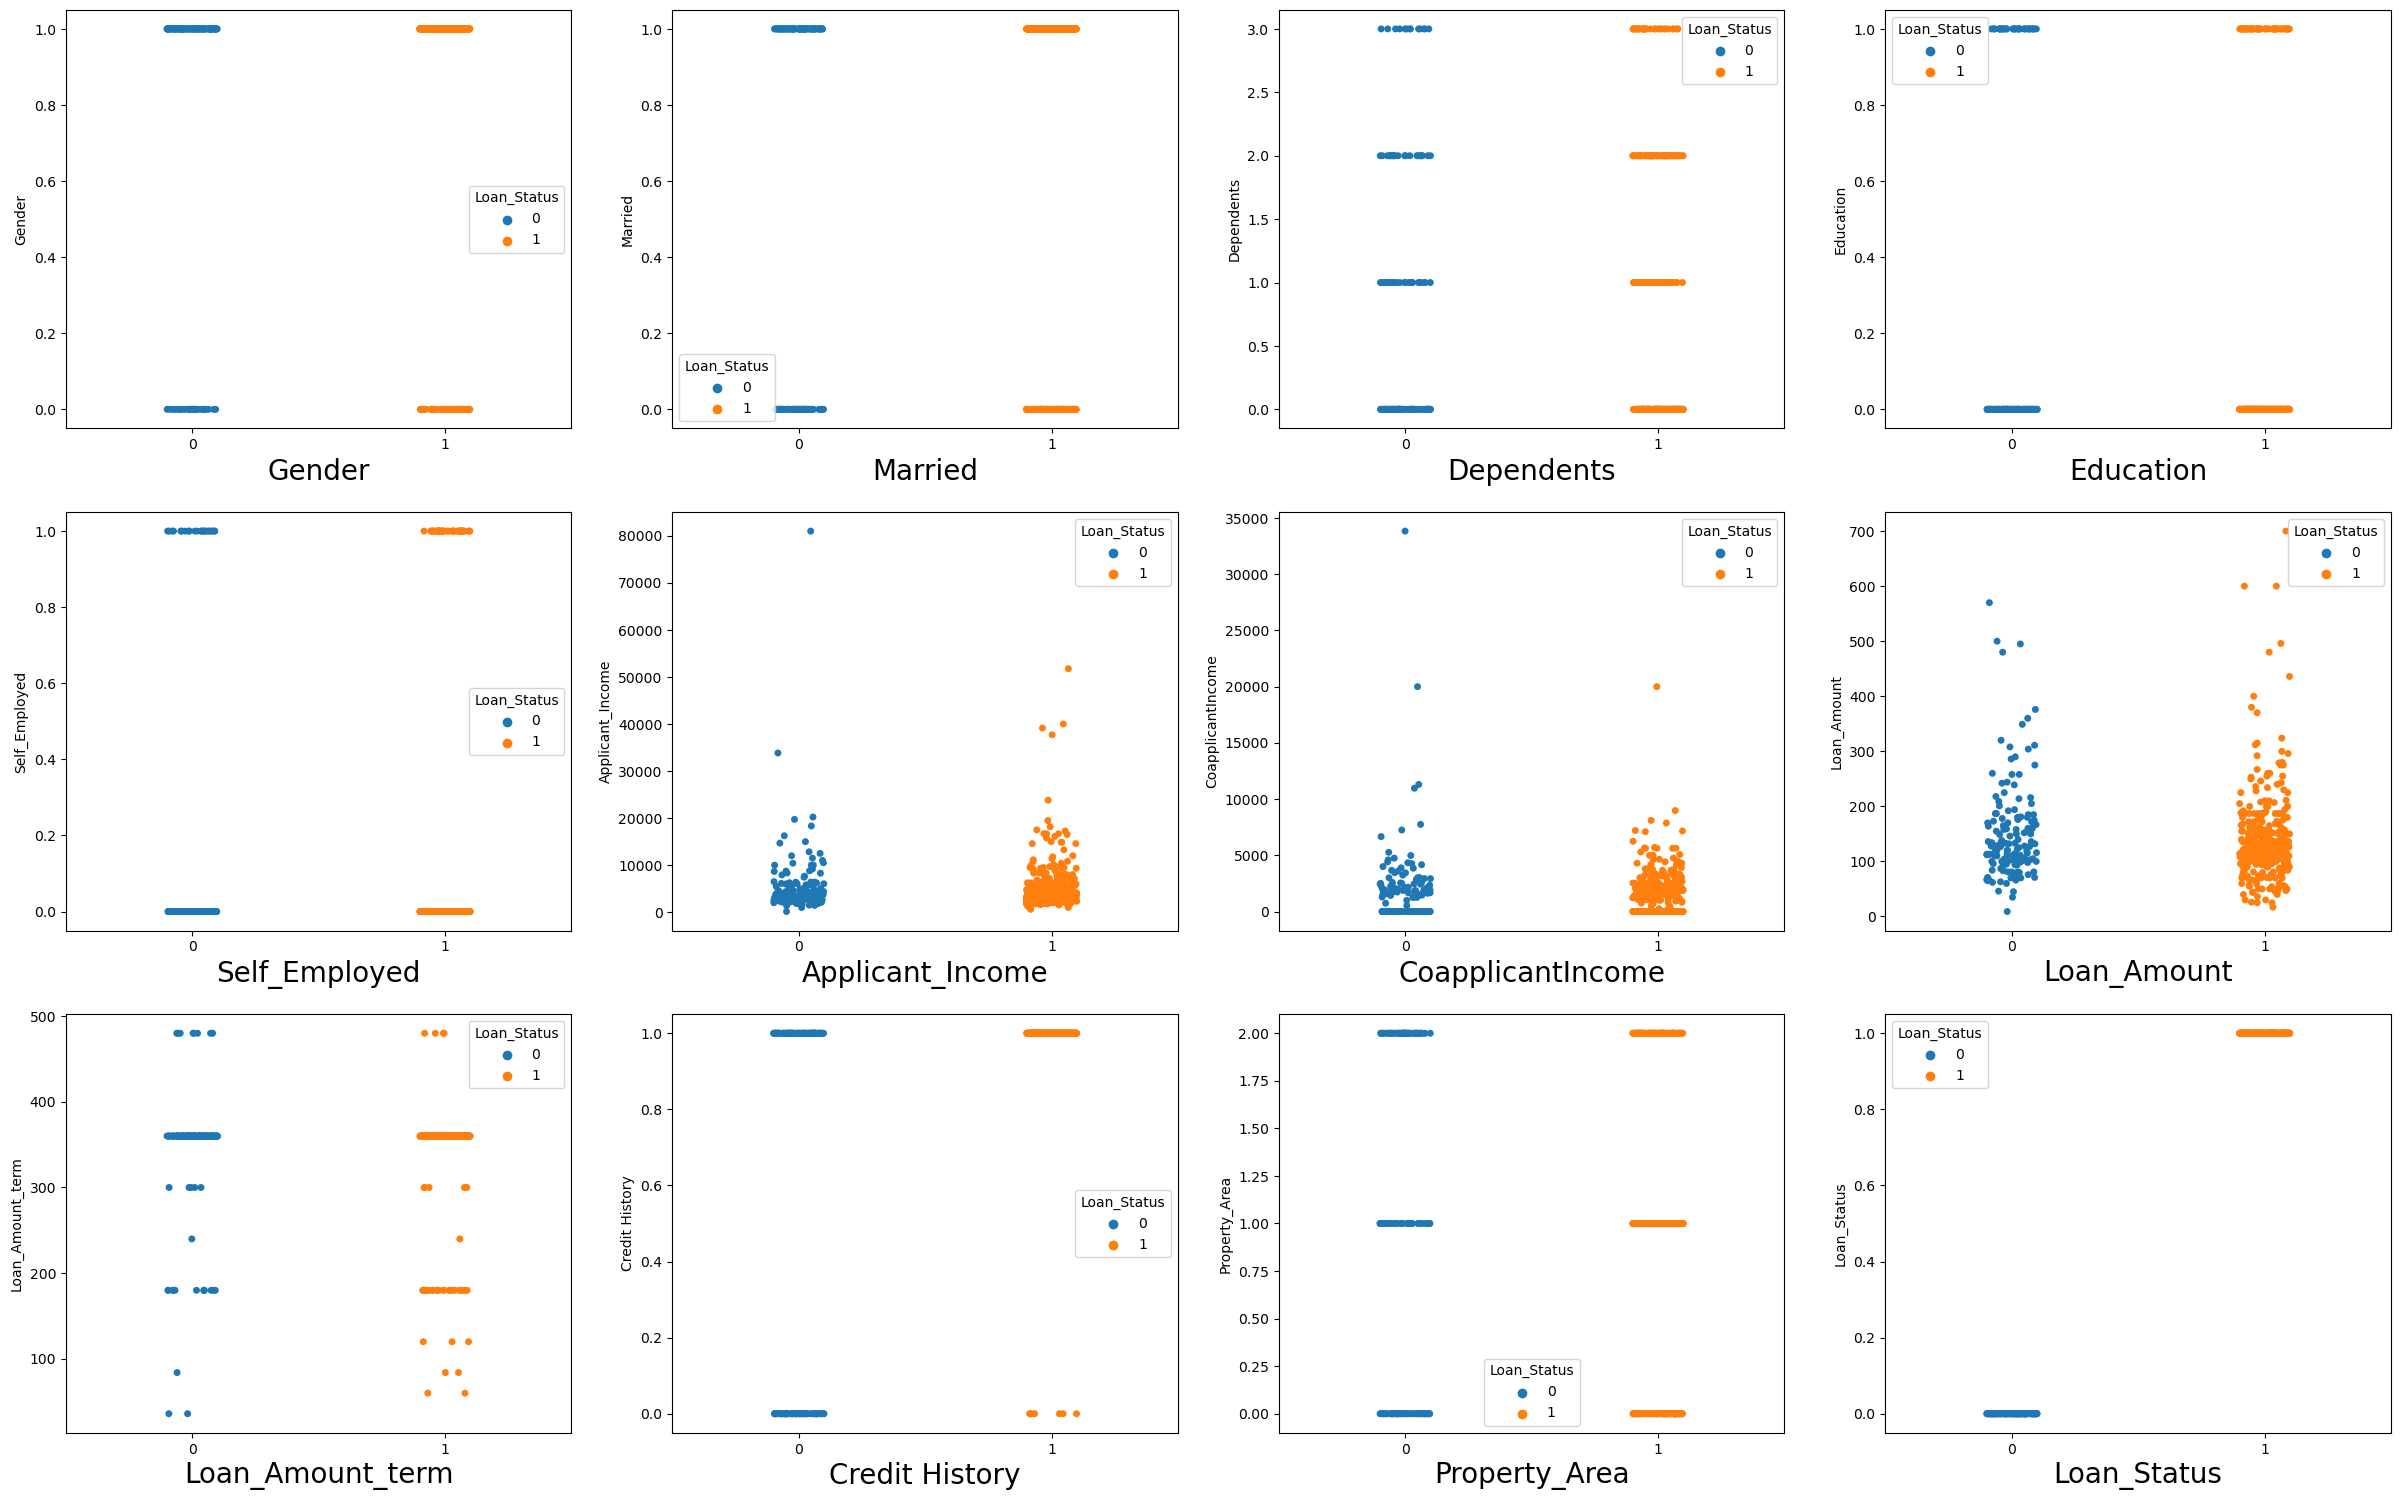

In [131]:
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.stripplot(data=df,x='Loan_Status',y=i,hue='Loan_Status')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

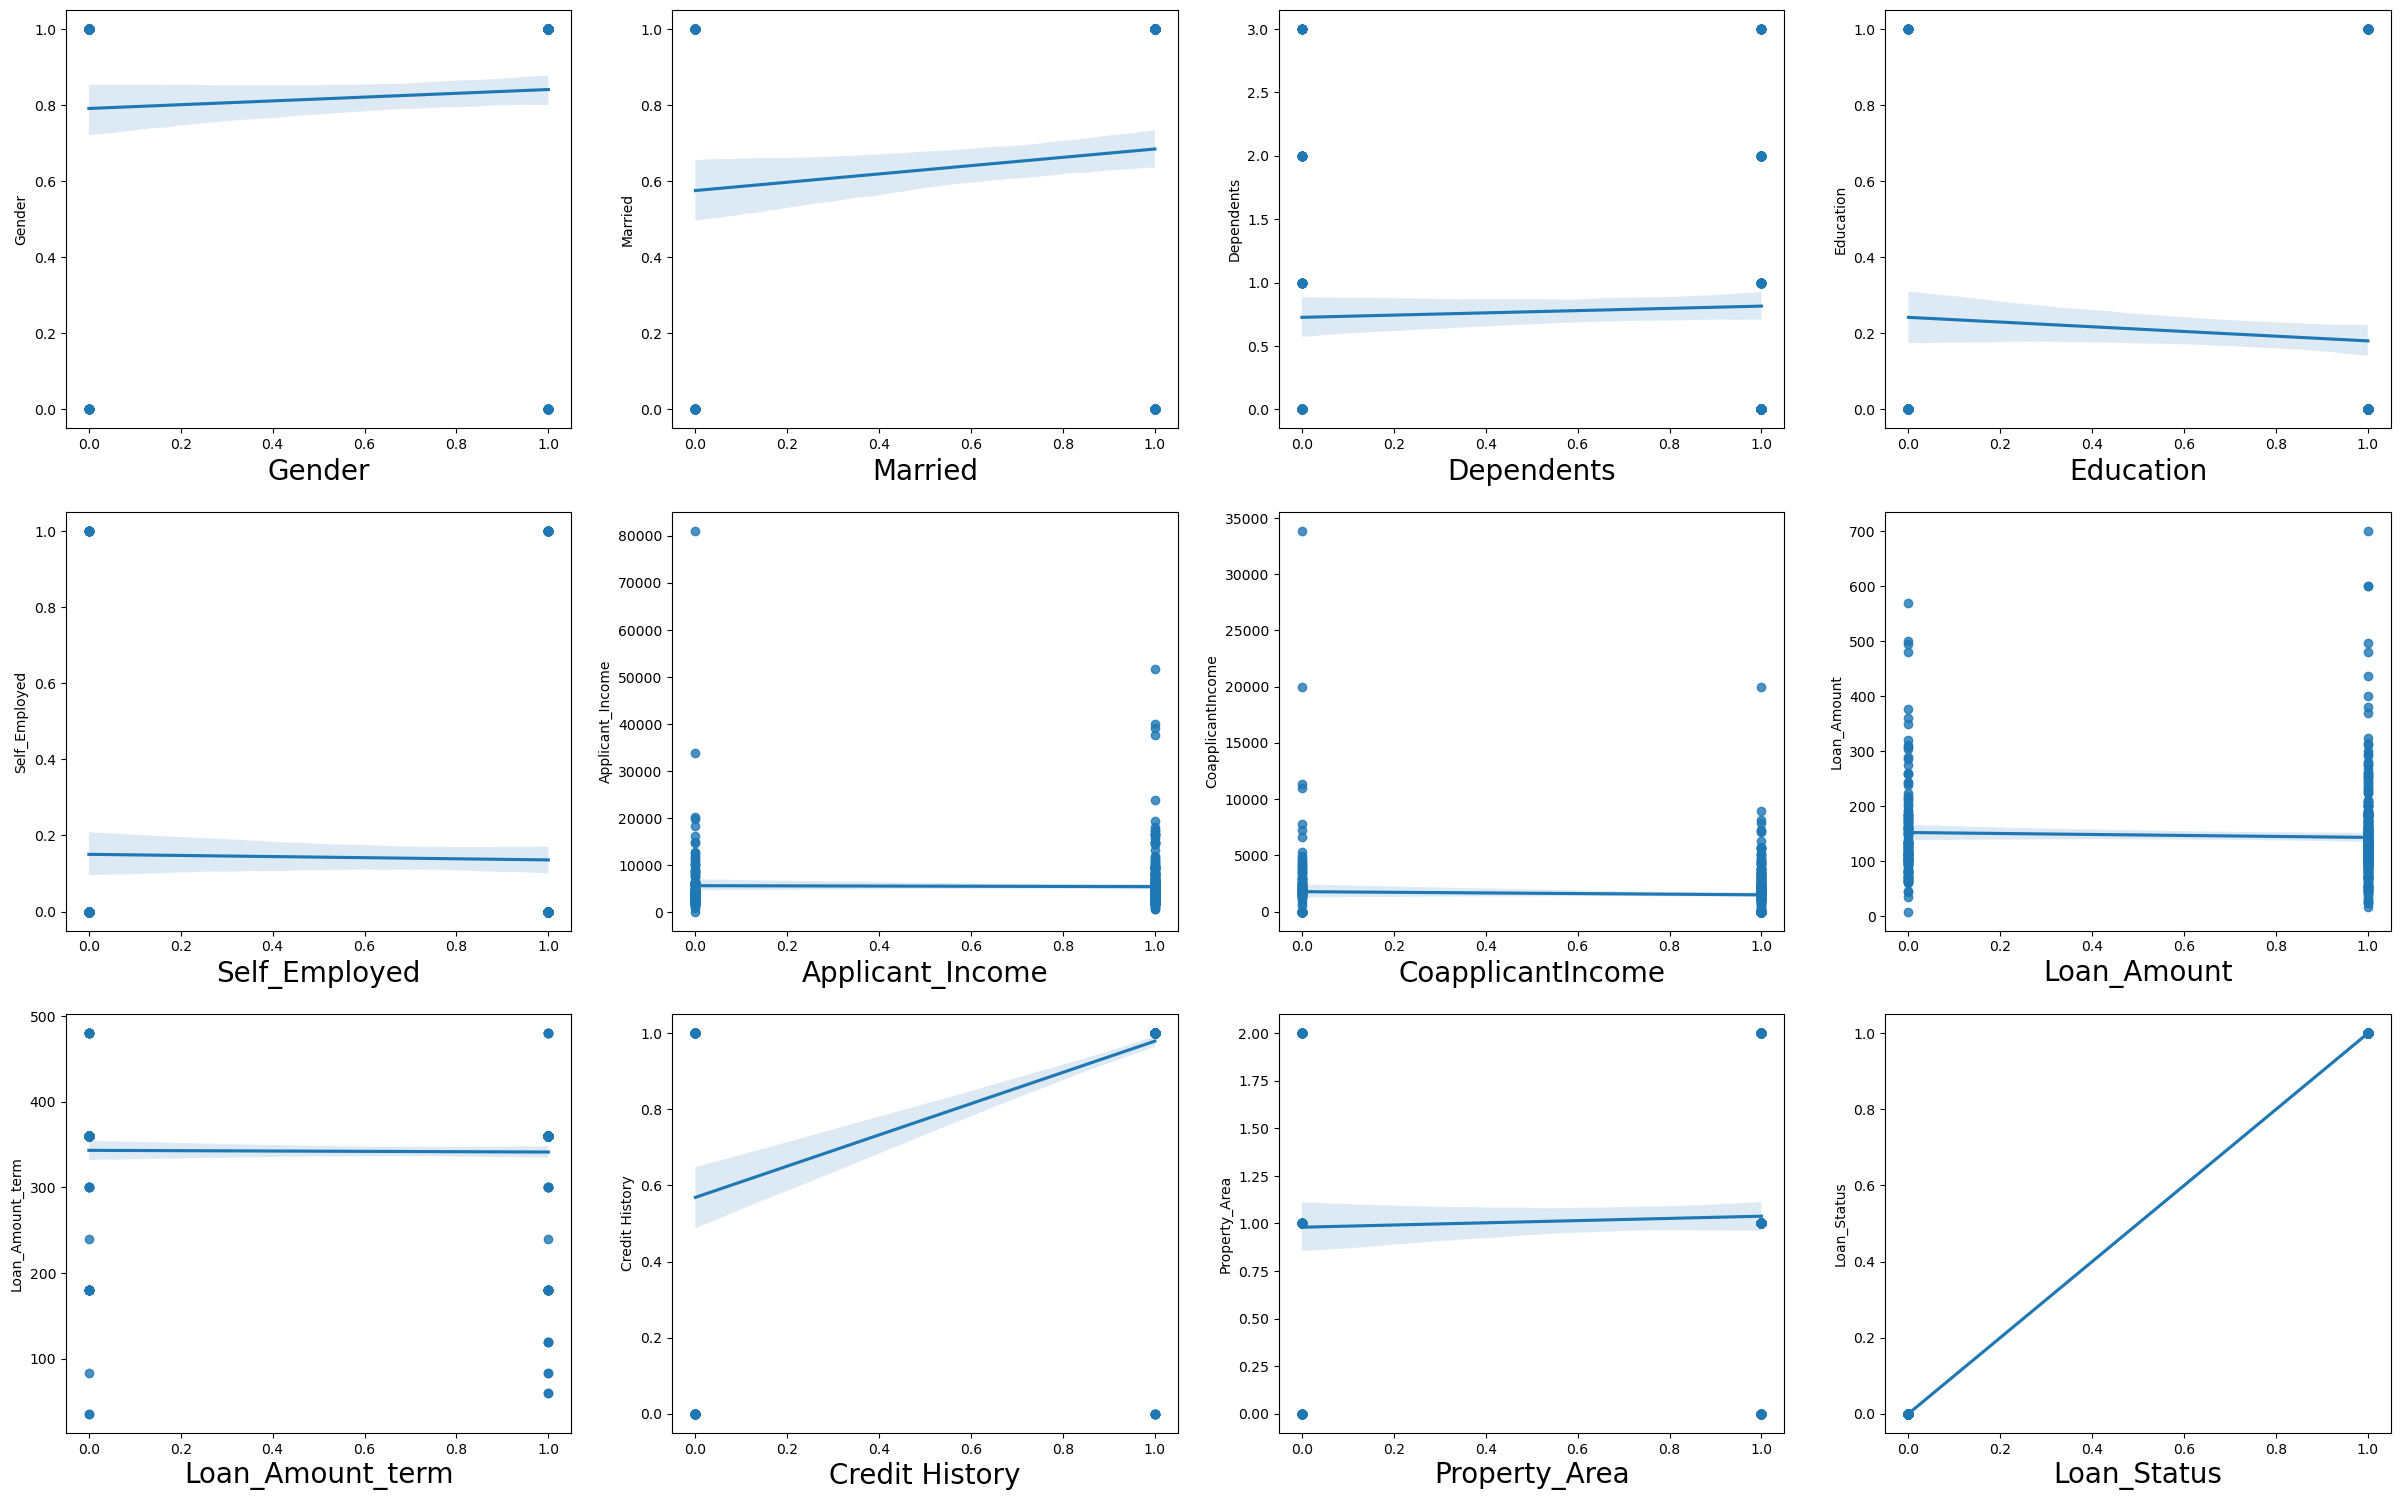

In [132]:
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.regplot(data=df,x='Loan_Status',y=i,)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [133]:
# check statustic 
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_term,Credit History,Property_Area,Loan_Status
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.825203,0.650407,0.786585,0.199187,0.140244,5502.203252,1572.959187,146.390244,342.000000,0.851626,1.020325,0.689024
std,0.380180,0.477327,1.029693,0.399795,0.347593,6069.324665,2597.096132,84.352947,64.902747,0.355832,0.776168,0.463364
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5936.500000,2250.000000,170.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


gender , married , dependent, education , self_employed, loan_amount_term, credit_history and property area is catogorical feature

applicant_income, coaaplicantincome, Loan_amount is continous feature

all continious feature have right skewness and outlier 

In [134]:
# check skewness 
df.skew()

Gender              -1.717770
Married             -0.632776
Dependents           0.931102
Education            1.510977
Self_Employed        2.078432
Applicant_Income     6.411776
CoapplicantIncome    5.887565
Loan_Amount          2.575787
Loan_Amount_term    -2.338815
Credit History      -1.984426
Property_Area       -0.035164
Loan_Status         -0.819209
dtype: float64

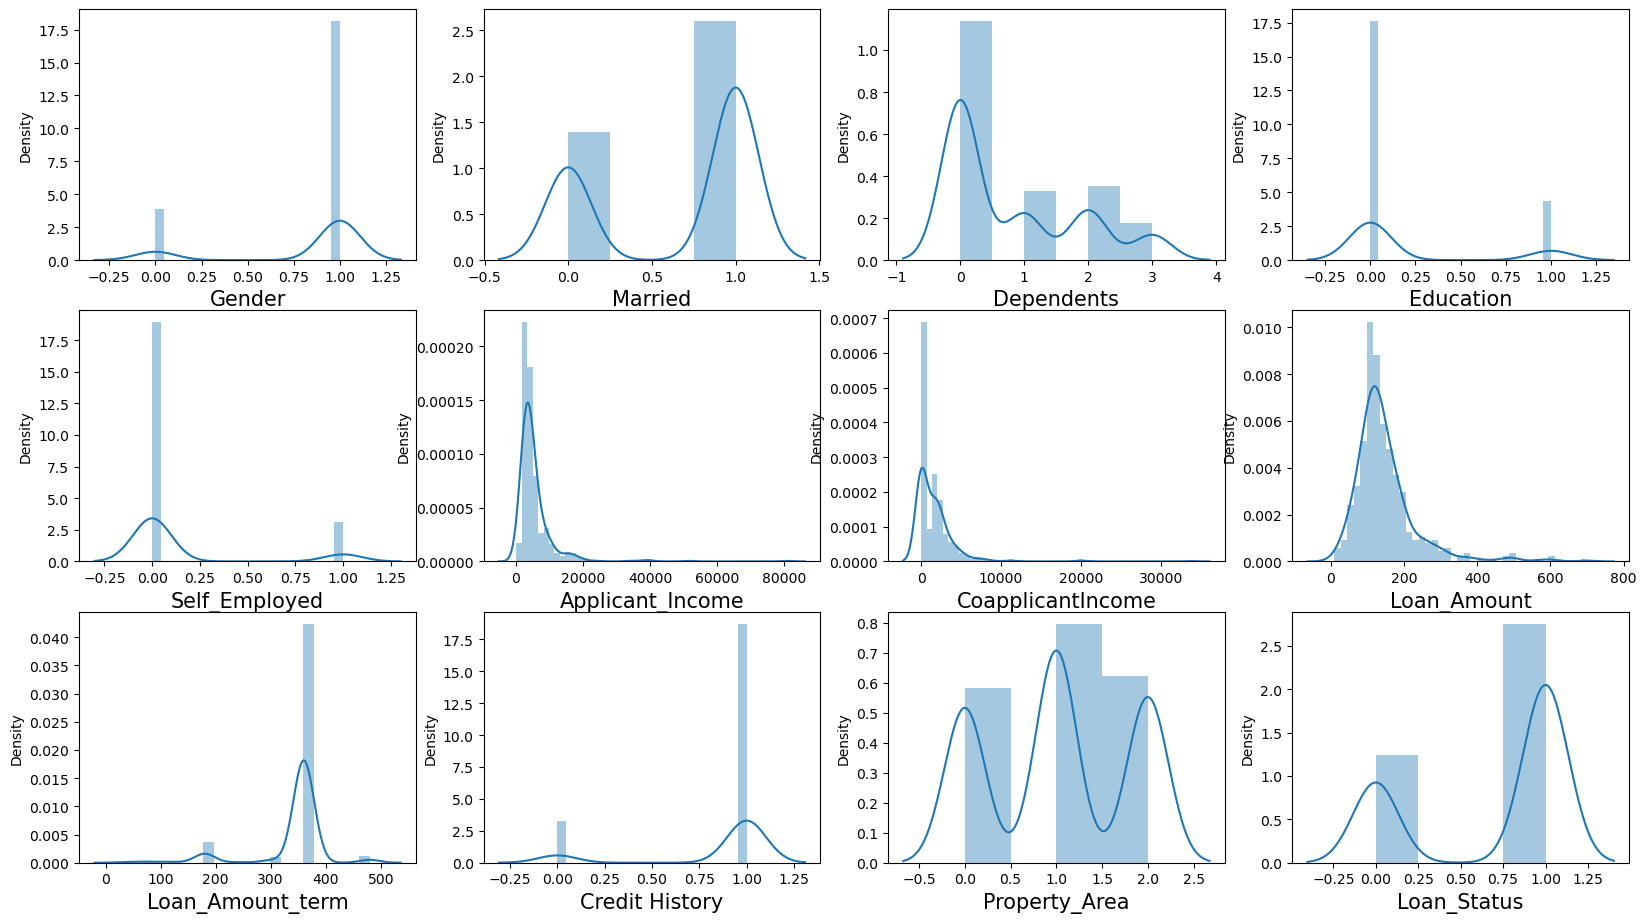

In [135]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

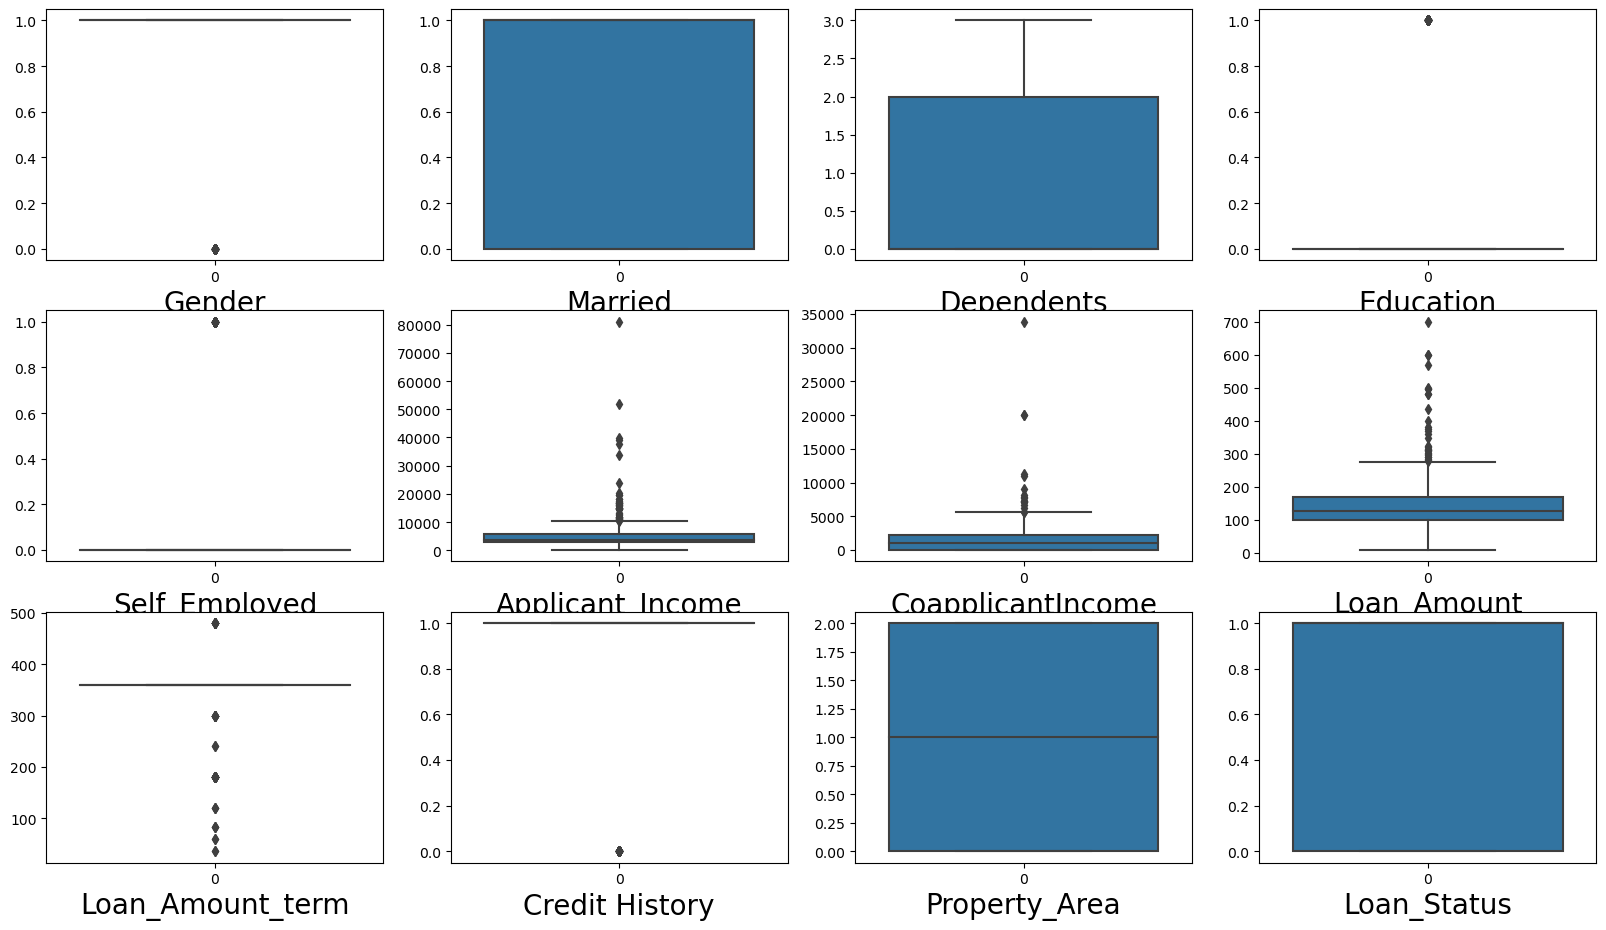

In [136]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [137]:
# keep outlier usning powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [138]:
df['Applicant_Income'] = pt.fit_transform(df[['Applicant_Income']])
df['CoapplicantIncome'] = pt.fit_transform(df[['CoapplicantIncome']])
df['Loan_Amount'] = pt.fit_transform(df[['Loan_Amount']])

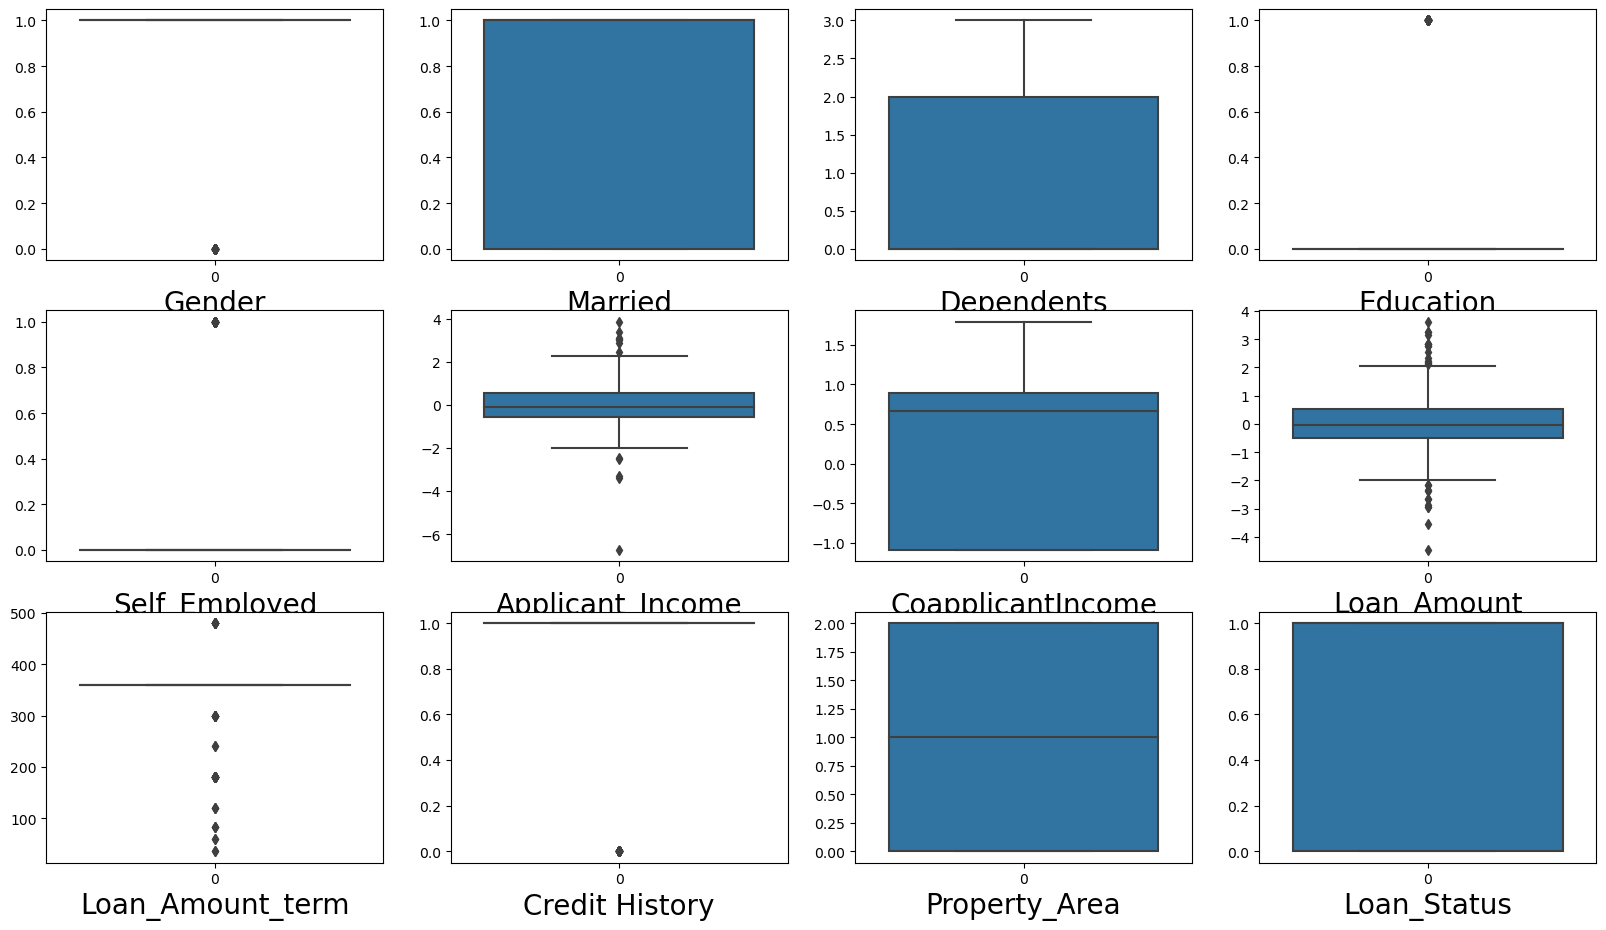

In [139]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

applicantincome and loan ammount have outlier present we drop outlier usning iqr method  

In [140]:
income_iqr = df['Applicant_Income'].quantile(0.75) - df['Applicant_Income'].quantile(0.25)
income_high = df['Applicant_Income'].quantile(0.75) + (1.5 * income_iqr) 
income_index = np.where(df['Applicant_Income'] > income_high)
df.drop(df.index[income_index],inplace=True)


In [141]:
income_low = df['Applicant_Income'].quantile(0.25) - (1.5 * income_iqr)
index = np.where(df['Applicant_Income'] < income_low)
df.drop(df.index[index],inplace=True)

In [142]:
amount_iqr = df['Loan_Amount'].quantile(0.75) - df['Loan_Amount'].quantile(0.25)
amount_high = df['Loan_Amount'].quantile(0.75) + (1.5 * amount_iqr)
amount_index = np.where(df['Loan_Amount']>amount_high)
df.drop(df.index[amount_index],inplace=True)

In [143]:
amount_low = df['Loan_Amount'].quantile(0.25) - (1.5 * amount_iqr)
Index = np.where(df['Loan_Amount']<amount_low)
df.drop(df.index[Index],inplace=True)

In [144]:
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_term,Credit History,Property_Area,Loan_Status
0,0,1,1,1,0,0,0.153107,0.769965,-0.036293,360.0,1.0,0,0
1,1,1,1,0,0,1,-0.532094,-1.088851,-1.286582,360.0,1.0,2,1
2,2,1,1,0,1,0,-0.784100,0.906993,-0.162274,360.0,1.0,2,1
3,3,1,0,0,0,0,0.567819,-1.088851,0.154224,360.0,1.0,2,1
4,4,1,1,2,0,1,0.412333,1.088271,1.463685,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,607,1,1,0,0,0,-0.408644,0.848379,-0.365998,360.0,1.0,0,1
454,608,0,0,0,0,0,-0.588712,-1.088851,-1.153356,360.0,1.0,0,1
455,610,1,1,1,0,0,1.006495,0.238384,1.349693,360.0,1.0,2,1
456,611,1,1,2,0,0,0.915610,-1.088851,0.722079,360.0,1.0,2,1


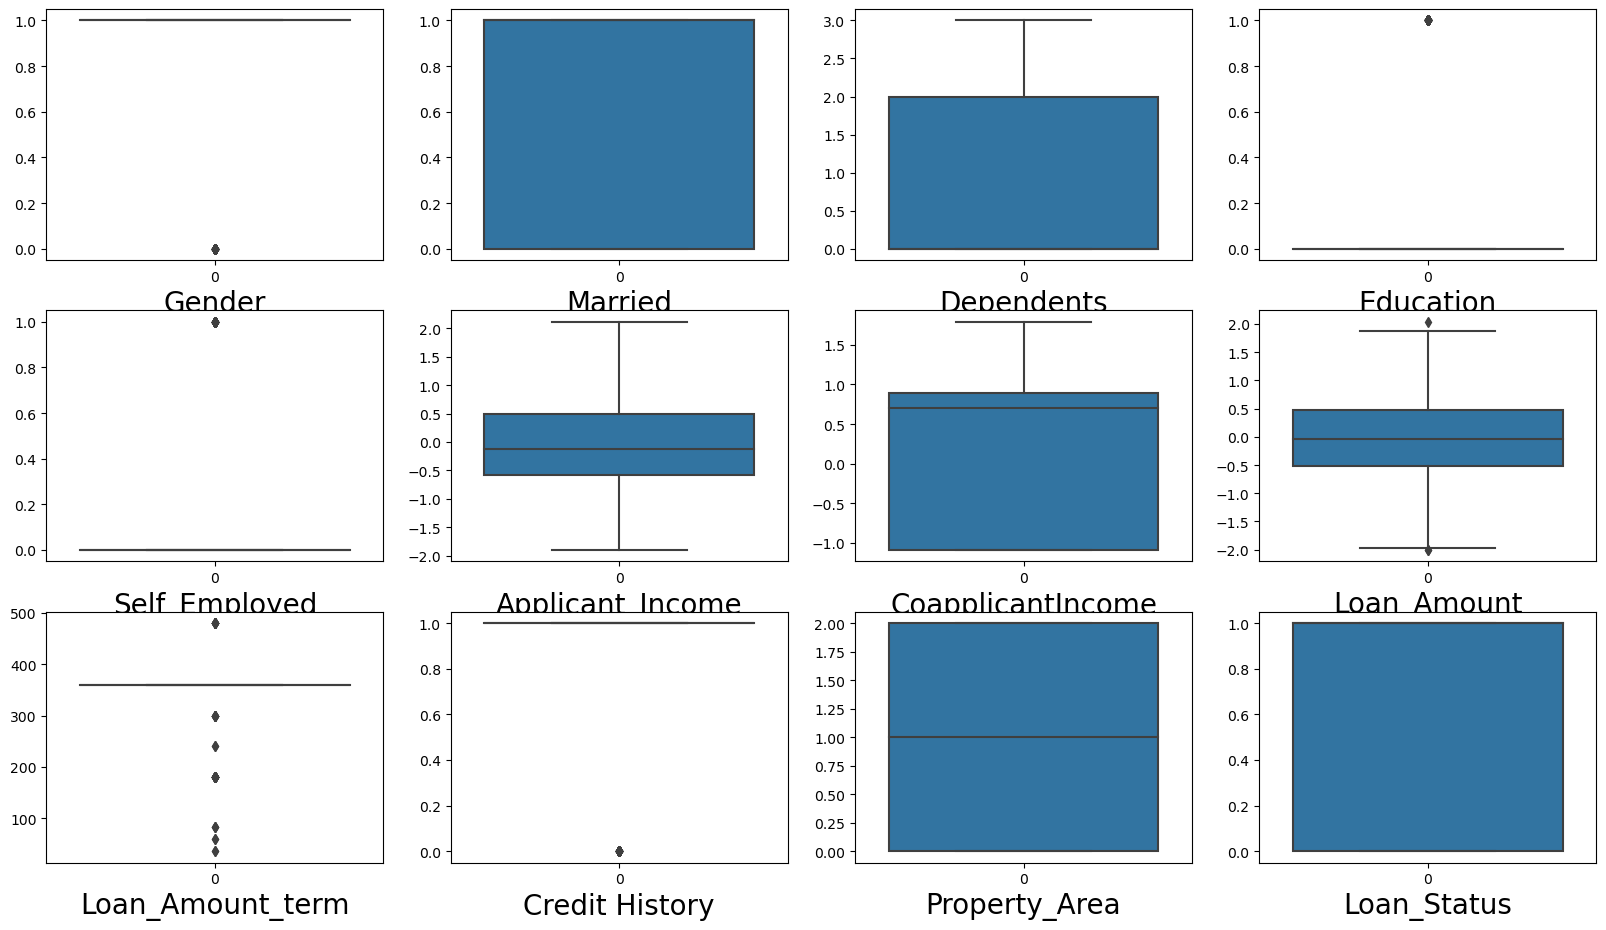

In [145]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

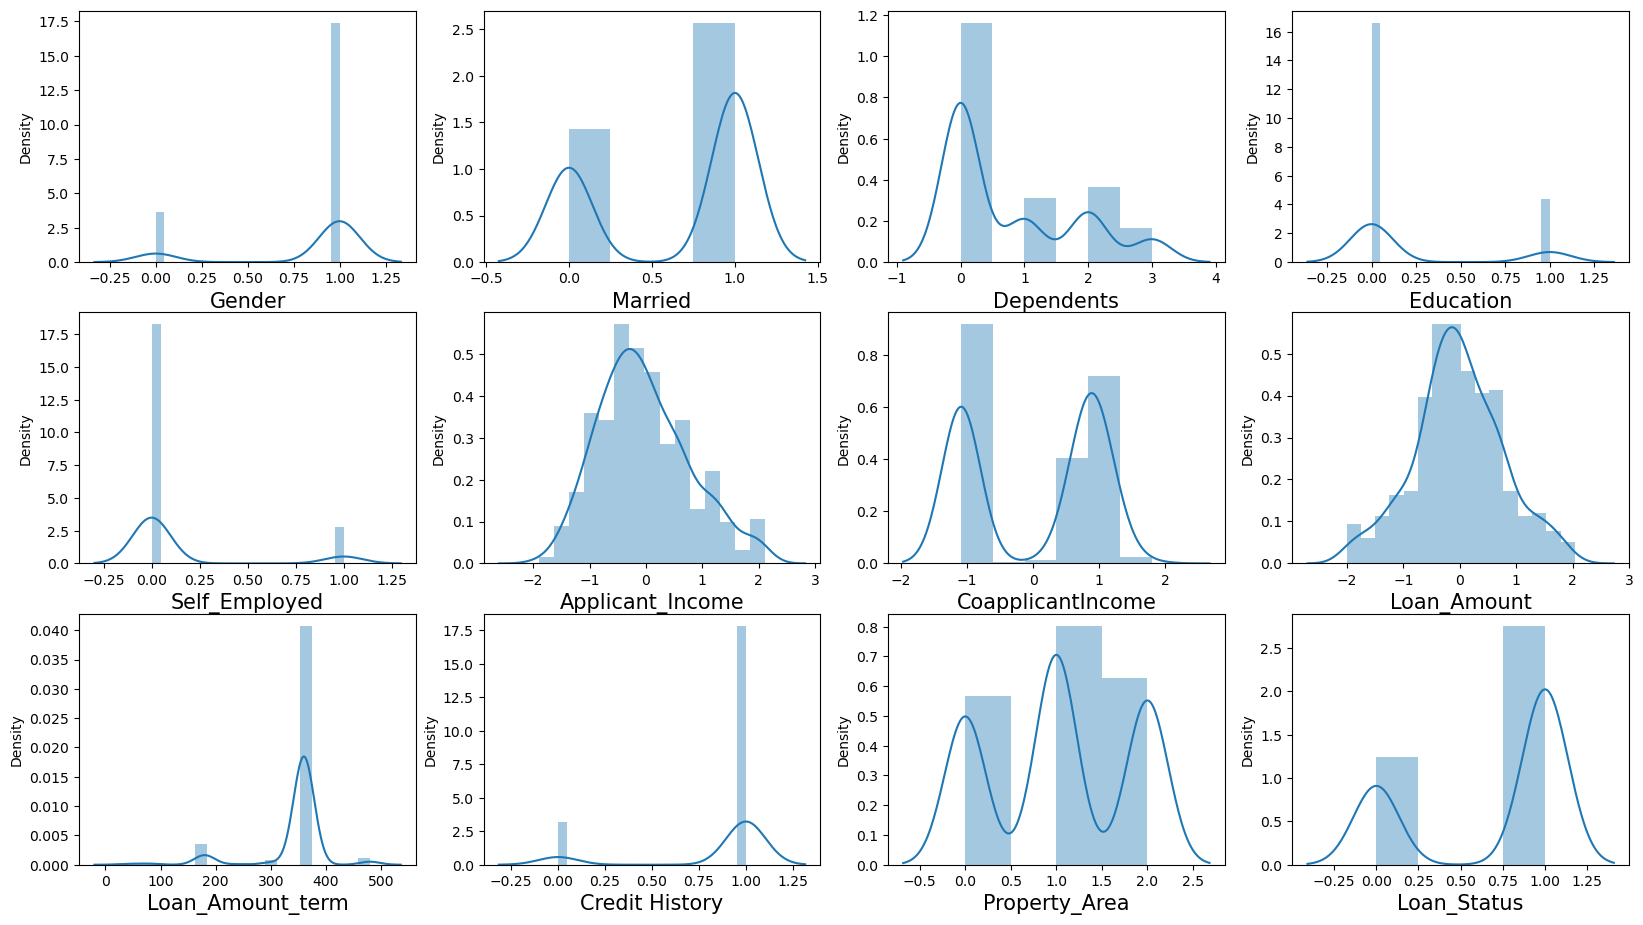

In [146]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=12:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [147]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [148]:
# check realationship label vs feature
x.corrwith(y)

Gender               0.081301
Married              0.109816
Dependents           0.036236
Education           -0.072324
Self_Employed       -0.033543
Applicant_Income     0.018345
CoapplicantIncome    0.054520
Loan_Amount         -0.021927
Loan_Amount_term     0.009923
Credit History       0.549091
Property_Area        0.038729
dtype: float64

education, self_employed  and loan_amount is negative realation with label

loan_amount_term is less contribute with label

<Axes: >

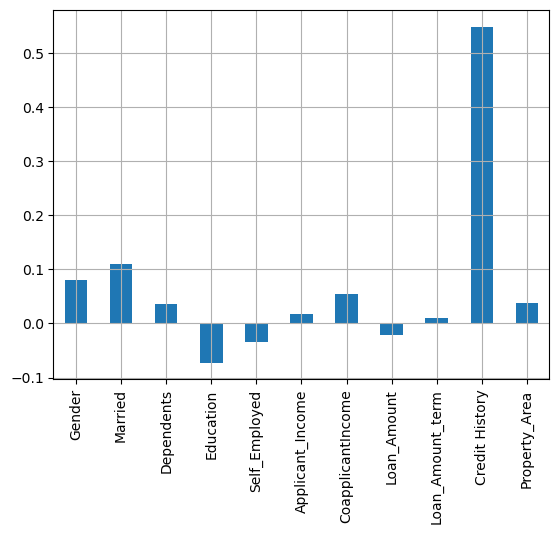

In [149]:
x.corrwith(y).plot(kind='bar',grid=True)

In [150]:
# check correlation feature vs feature and label
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_term,Credit History,Property_Area,Loan_Status
Gender,1.000000,0.346096,0.212829,0.050532,-0.011145,0.043464,0.234670,0.145374,-0.067653,0.033899,0.018057,0.081301
Married,0.346096,1.000000,0.373838,0.026579,-0.020453,-0.022053,0.323262,0.193930,-0.106183,0.029187,0.053110,0.109816
Dependents,0.212829,0.373838,1.000000,0.049608,0.050892,0.117082,0.019737,0.161100,-0.078085,-0.000719,0.011835,0.036236
Education,0.050532,0.026579,0.049608,1.000000,0.006734,-0.174331,0.044381,-0.167710,-0.097767,-0.068039,-0.075894,-0.072324
Self_Employed,-0.011145,-0.020453,0.050892,0.006734,1.000000,0.263839,-0.106563,0.099498,-0.043055,-0.017379,-0.023730,-0.033543
Applicant_Income,0.043464,-0.022053,0.117082,-0.174331,0.263839,1.000000,-0.383704,0.480623,-0.041435,0.073369,-0.022245,0.018345
CoapplicantIncome,0.234670,0.323262,0.019737,0.044381,-0.106563,-0.383704,1.000000,0.192112,-0.017163,-0.010861,-0.039850,0.054520
Loan_Amount,0.145374,0.193930,0.161100,-0.167710,0.099498,0.480623,0.192112,1.000000,0.037399,0.015940,-0.074138,-0.021927
Loan_Amount_term,-0.067653,-0.106183,-0.078085,-0.097767,-0.043055,-0.041435,-0.017163,0.037399,1.000000,0.025882,-0.064347,0.009923
Credit History,0.033899,0.029187,-0.000719,-0.068039,-0.017379,0.073369,-0.010861,0.015940,0.025882,1.000000,-0.007035,0.549091


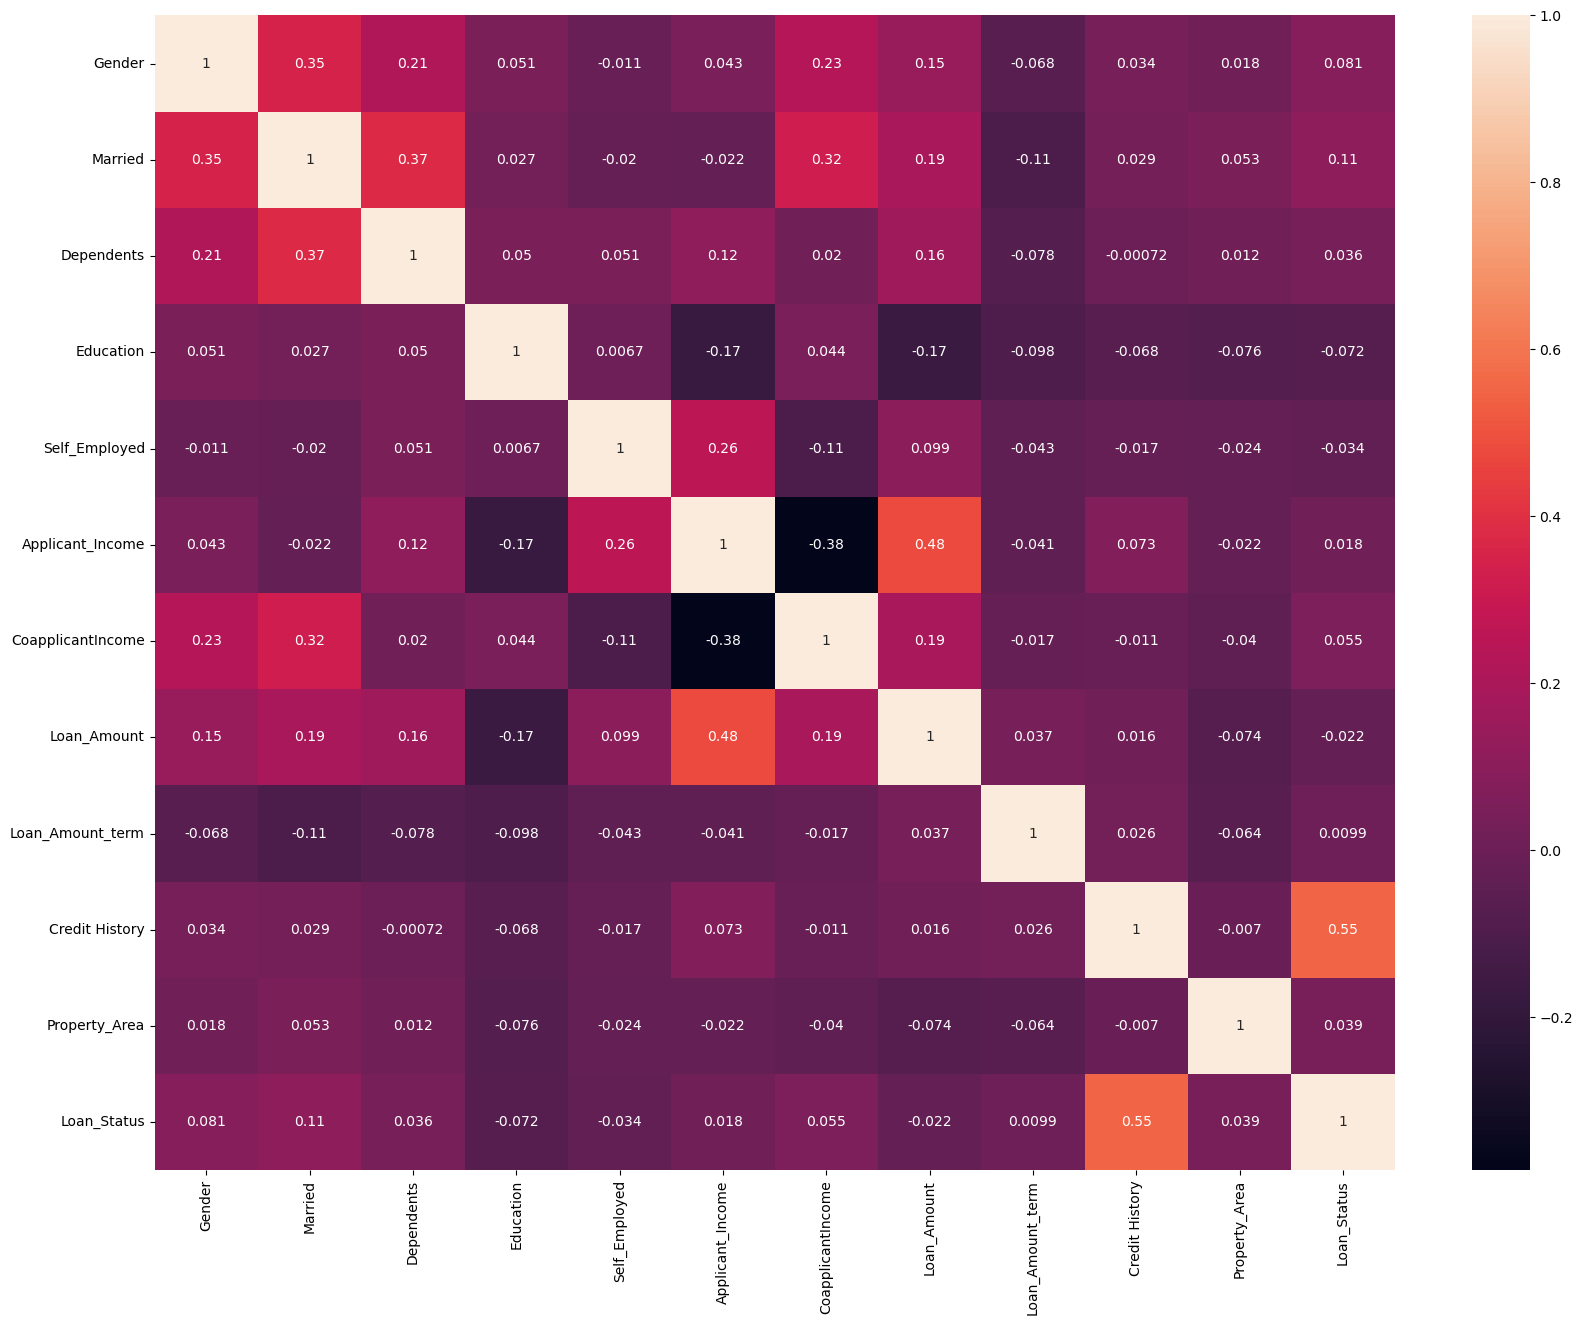

In [151]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [152]:
# drop loan_amount_term feature which less contribute to label
df.drop('Loan_Amount_term',axis=1,inplace=True)

In [173]:
# seprate feature vs label
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [174]:
# check multicolinearity problem using vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [175]:
scaled = StandardScaler()
scal = pd.DataFrame(scaled.fit_transform(x),columns=x.columns)

In [177]:
v = []
for i in range(scal.shape[1]):
    x = variance_inflation_factor(scal,i)
    v.append(x)
vif = pd.DataFrame()
vif['vif'] = v
vif['feature'] = scal.columns
vif

,vif,feature
0,1.193645,Gender
1,1.407394,Married
2,1.215508,Dependents
3,1.068070,Education
4,1.082312,Self_Employed
5,2.018734,Applicant_Income
6,1.680887,CoapplicantIncome
7,1.713245,Loan_Amount
8,1.013962,Credit History
9,1.022281,Property_Area


<Axes: xlabel='Loan_Status', ylabel='count'>

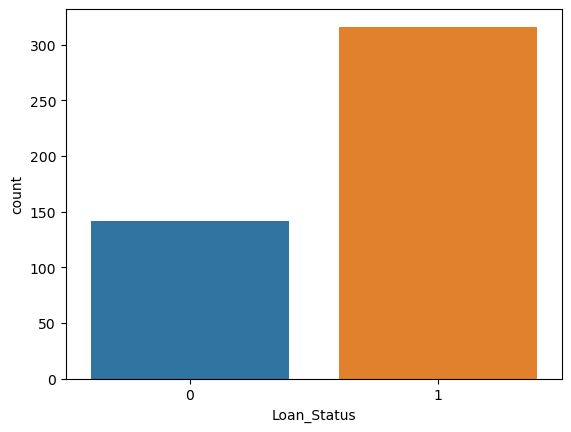

In [188]:
# check data imblance or not 
sns.countplot(data=df,x='Loan_Status')

data is imbalnaced we balnced data usning smote method

In [239]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve
from sklearn.model_selection import cross_val_score,GridSearchCV, RandomizedSearchCV

In [204]:
x_train,x_test,y_train,y_test = train_test_split(scal,y,test_size=0.30,random_state=155)

In [207]:
smp = SMOTE(random_state = 75, k_neighbors=3, sampling_strategy=0.80)
X_train,Y_train= smp.fit_resample(x_train,y_train)
Counter(Y_train)

Counter({1: 231, 0: 184})

In [208]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,y_pred))

Accuracy Score :
 0.7463768115942029


Confusion Score :
 [[23 30]
 [ 5 80]]


Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.43      0.57        53
           1       0.73      0.94      0.82        85

    accuracy                           0.75       138
   macro avg       0.77      0.69      0.69       138
weighted avg       0.76      0.75      0.72       138



In [213]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,knn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,knn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,knn_pred))

Accuracy Score :
 0.6811594202898551


Confusion Score :
 [[26 27]
 [17 68]]


Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.49      0.54        53
           1       0.72      0.80      0.76        85

    accuracy                           0.68       138
   macro avg       0.66      0.65      0.65       138
weighted avg       0.67      0.68      0.67       138



In [214]:
bg = BaggingClassifier()
bg.fit(X_train,Y_train)
bg_pred = bg.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,bg_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,bg_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,bg_pred))

Accuracy Score :
 0.7536231884057971


Confusion Score :
 [[25 28]
 [ 6 79]]


Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.47      0.60        53
           1       0.74      0.93      0.82        85

    accuracy                           0.75       138
   macro avg       0.77      0.70      0.71       138
weighted avg       0.76      0.75      0.74       138



In [215]:
rmf = RandomForestClassifier()
rmf.fit(X_train,Y_train)
rmf_pred = rmf.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,rmf_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,rmf_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,rmf_pred))

Accuracy Score :
 0.7536231884057971


Confusion Score :
 [[24 29]
 [ 5 80]]


Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.45      0.59        53
           1       0.73      0.94      0.82        85

    accuracy                           0.75       138
   macro avg       0.78      0.70      0.71       138
weighted avg       0.77      0.75      0.73       138



In [216]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
ada_pred = ada.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,ada_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,ada_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,ada_pred))

Accuracy Score :
 0.7463768115942029


Confusion Score :
 [[28 25]
 [10 75]]


Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        53
           1       0.75      0.88      0.81        85

    accuracy                           0.75       138
   macro avg       0.74      0.71      0.71       138
weighted avg       0.74      0.75      0.74       138



In [219]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
gbc_pred = gbc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,gbc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,gbc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,gbc_pred))

Accuracy Score :
 0.7753623188405797


Confusion Score :
 [[26 27]
 [ 4 81]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.49      0.63        53
           1       0.75      0.95      0.84        85

    accuracy                           0.78       138
   macro avg       0.81      0.72      0.73       138
weighted avg       0.79      0.78      0.76       138



In [220]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,dt_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,dt_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,dt_pred))

Accuracy Score :
 0.7028985507246377


Confusion Score :
 [[28 25]
 [16 69]]


Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.53      0.58        53
           1       0.73      0.81      0.77        85

    accuracy                           0.70       138
   macro avg       0.69      0.67      0.67       138
weighted avg       0.70      0.70      0.70       138



In [221]:
svc = SVC()
svc.fit(X_train,Y_train)
svc_pred = svc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,svc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,svc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,svc_pred))

Accuracy Score :
 0.7463768115942029


Confusion Score :
 [[23 30]
 [ 5 80]]


Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.43      0.57        53
           1       0.73      0.94      0.82        85

    accuracy                           0.75       138
   macro avg       0.77      0.69      0.69       138
weighted avg       0.76      0.75      0.72       138



In [223]:
LR_score = cross_val_score(LR,X_train,Y_train,cv=10)
print(LR_score)
print(LR_score.mean())
print(accuracy_score(y_test,y_pred) - LR_score.mean())

[0.83333333 0.71428571 0.71428571 0.76190476 0.64285714 0.7804878
 0.65853659 0.75609756 0.63414634 0.63414634]
0.7130081300813007
0.033368681512902176


In [224]:
bg_score = cross_val_score(bg,X_train,Y_train,cv=10)
print(bg_score)
print(bg_score.mean())
print(accuracy_score(y_test,bg_pred) - bg_score.mean())

[0.9047619  0.78571429 0.5952381  0.80952381 0.71428571 0.92682927
 0.87804878 0.92682927 0.92682927 0.90243902]
0.8370499419279908
-0.08342675352219364


In [225]:
rmf_score = cross_val_score(rmf,X_train,Y_train,cv=10)
print(rmf_score)
print(rmf_score.mean())
print(accuracy_score(y_test,rmf_pred) - rmf_score.mean())

[0.85714286 0.82142857 0.78571429 0.82142857 0.82142857 0.78571429
 0.71428571 0.85714286 0.89285714 0.85714286 0.92592593 1.
 0.85185185 0.92592593 1.        ]
0.8611992945326279
-0.10757610612683077


In [227]:
gbc_score = cross_val_score(gbc,X_train,Y_train,cv=10)
print(gbc_score)
print(gbc_score.mean())
print(accuracy_score(y_test,gbc_pred) - gbc_score.mean())

[0.83333333 0.73809524 0.76190476 0.80952381 0.69047619 0.90243902
 0.85365854 0.92682927 0.82926829 0.90243902]
0.8247967479674797
-0.04943442912689999


In [228]:
ada_score = cross_val_score(ada,X_train,Y_train,cv=10)
print(ada_score)
print(ada_score.mean())
print(accuracy_score(y_test,ada_pred) - ada_score.mean())

[0.76190476 0.80952381 0.66666667 0.76190476 0.66666667 0.90243902
 0.82926829 0.92682927 0.7804878  0.80487805]
0.7910569105691057
-0.04468009897490277


In [229]:
knn_score = cross_val_score(knn,X_train,Y_train,cv=10)
print(knn_score)
print(knn_score.mean())
print(accuracy_score(y_test,knn_pred) - knn_score.mean())

[0.80952381 0.73809524 0.76190476 0.71428571 0.73809524 0.92682927
 0.75609756 0.85365854 0.80487805 0.87804878]
0.7981416957026712
-0.11698227541281614


In [230]:
dt_score = cross_val_score(dt,X_train,Y_train,cv=10)
print(dt_score)
print(dt_score.mean())
print(accuracy_score(y_test,dt_pred) - dt_score.mean())

[0.80952381 0.66666667 0.5952381  0.83333333 0.78571429 0.85365854
 0.73170732 0.92682927 0.92682927 0.85365854]
0.798315911730546
-0.09541736100590825


In [231]:
svc_score = cross_val_score(svc,X_train,Y_train,cv=10)
print(svc_score)
print(svc_score.mean())
print(accuracy_score(y_test,svc_pred) - svc_score.mean())

[0.88095238 0.85714286 0.78571429 0.73809524 0.69047619 0.82926829
 0.80487805 0.85365854 0.68292683 0.7804878 ]
0.7903600464576075
-0.04398323486340461


the best model is DecisionTreeClassifier

In [233]:
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
             'splitter' : ["best", "random"],
             'max_depth' :np.arange(1,10),
             'min_samples_split' :np.arange(1,10),
             'min_samples_leaf' :np.arange(1,10),
              'random_state' : np.arange(10,200,10)
             }

In [235]:
random_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=param_grid,cv=10,scoring='accuracy',random_state=255)
random_dt.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'splitter': ['best', 'random']},
                   random_state=255, scoring='accuracy')

In [237]:
random_dt.best_params_

{'splitter': 'best',
 'random_state': 190,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 6,
 'criterion': 'gini'}

In [238]:
Dt = DecisionTreeClassifier(splitter= 'best',
 random_state= 190,
 min_samples_split = 8,
 min_samples_leaf =3,
 max_depth=6,
 criterion= 'gini')
Dt.fit(X_train,Y_train)
Dt_pred = Dt.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,Dt_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,Dt_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,Dt_pred))

Accuracy Score :
 0.7681159420289855


Confusion Score :
 [[28 25]
 [ 7 78]]


Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.53      0.64        53
           1       0.76      0.92      0.83        85

    accuracy                           0.77       138
   macro avg       0.78      0.72      0.73       138
weighted avg       0.77      0.77      0.76       138



accuracy increase 6% percent 

In [240]:
fpr,tpr,threshold = roc_curve(y_test,Dt_pred)

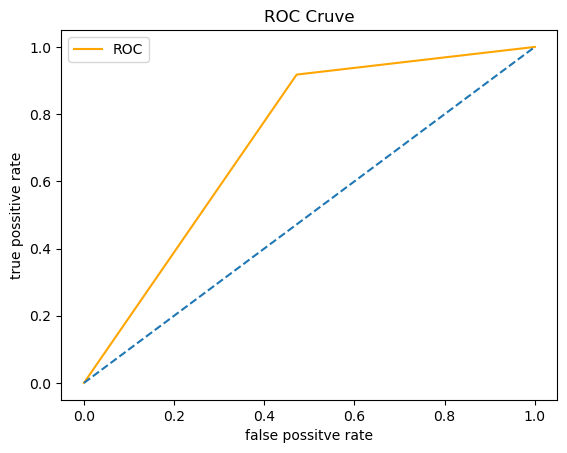

In [241]:
plt.plot(fpr,tpr,color='Orange',label='ROC')
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('false possitve rate')
plt.ylabel('true possitive rate')
plt.title('ROC Cruve')
plt.legend()
plt.show()

In [244]:
import pickle 
filename = 'Loan.pkl'
pickle.dump(Dt,open(filename,'wb'))


In [246]:
load = pickle.load(open('Loan.pkl','rb'))
load.score(x_test,y_test)

0.7681159420289855